<a href="https://colab.research.google.com/github/sardarabdulsammad/DeepLearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Pytorch end to end workflow.

What We are covering?
1. Data (prepare and load)
2. Building model
3. Fitting model to data(training)
4. Making Predictions and evaluation the model
5. saving and reload
6. Putting all together



In [2]:
import torch
from torch import nn
## nn contains all of the pytorch's building block for neural networks
import matplotlib.pyplot as plt
#checkout version of pytorch

torch.__version__

'2.6.0+cu124'

## 1. Data (Prepare and Load)

Data can be almost anything in ML

* Excel spreadsheet
* Images
* Text
* Videos
* ....

Machine learning is the game of two parts:

1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

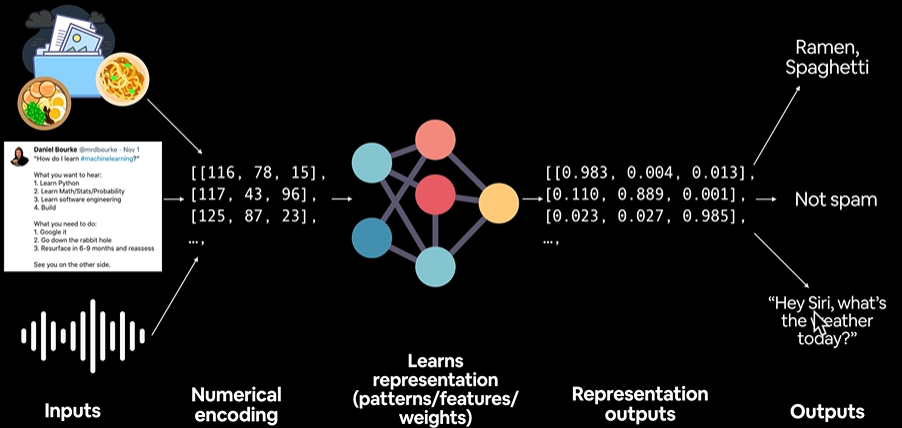


To Showcase this, Let's create some *known* data using linear regression formula.

We will be using a linear regression formula to make straight line with *known* parameter

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bias

X[:10],len(X)



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

###Splitting data in training and testing


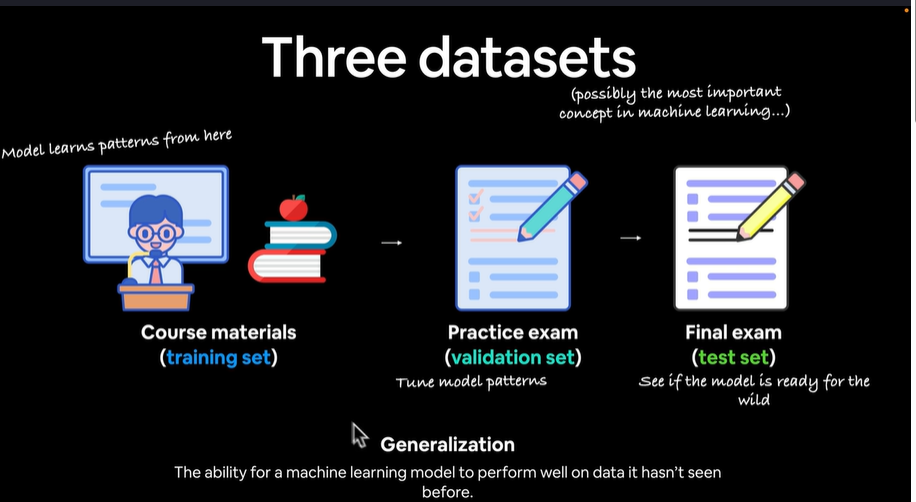

In [4]:
# Create a train test split

train_split = int(0.8* len(X))
X_train , Y_train = X[:train_split] , Y[:train_split]
X_test,Y_test  = X[train_split:], Y[train_split:]

len(X_train) , len(Y_train) , len(X_test), len(Y_test)

(40, 40, 10, 10)

In [5]:
#visualization of data

def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  """
  Plots training data , test data compares predictions
  """
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r", s=4, label = "predictions")

  plt.legend(prop={"size" : 14});


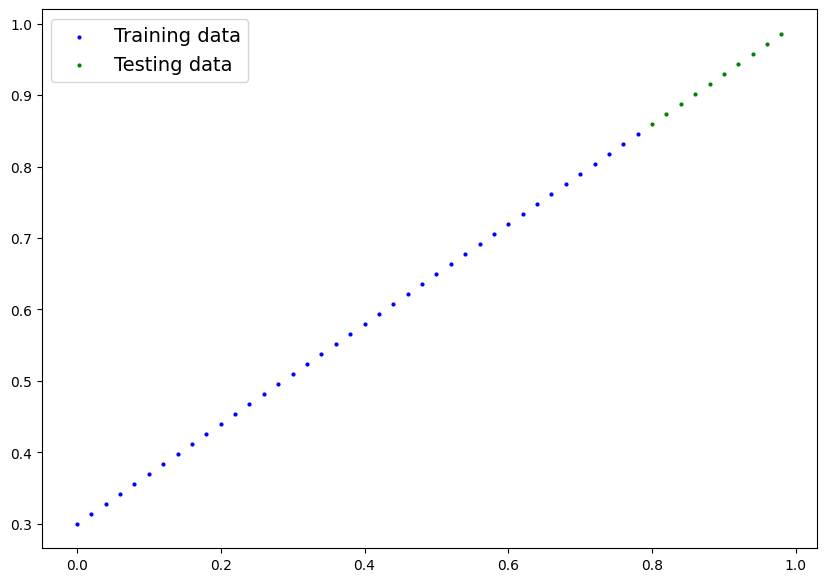

In [6]:
plot_predictions()

## 2. building model

Our first pytorch model
We will be building classes through out

* Remember that we wrote known parameters above of weight and bias,
*  Here What we are actually doing is starting off with random values
* OR assigning random values to weights and bias and using forward funtion updating the bias and weights values to get close to known values


How does it all works?

Through two main algorithms:
1. Gradient Descent
2. backward propogation

* and because of gradient descent we used **requires_grad = true**, so that python keeps tracks of gradients of our weight and bias parameters and update them.

* Also in code below,we created a model and We initialized model parameters with random values, we could also initialize them with 0 as well.

In [7]:
# creating a linear regression model class
from torch import nn
#class inherits from nn.module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

    # Forward Method to define computation in the model, we need to define forward class as nn.module require us to do so
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias


What actually happening in the code

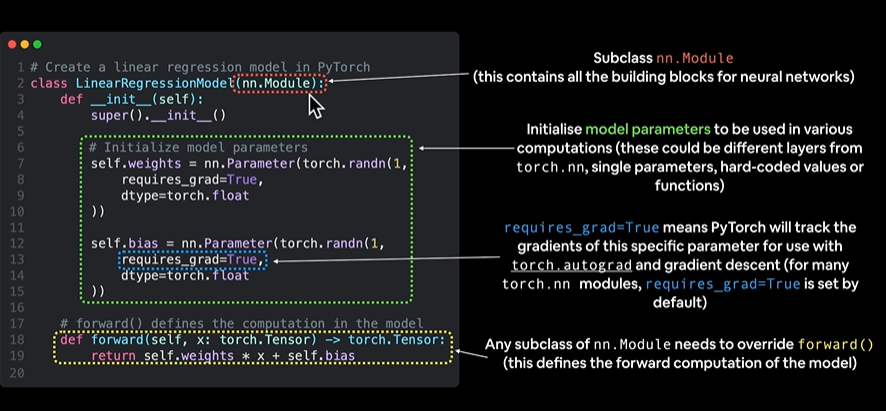

### PyTorch model building essentials

* torch.nn - contains all the building for computational graphs(a neural network can be considered computational graph)
* torch.nn.Parameters - What parameters should our model try and learn, often a pytorch later from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network models, if you subclass it you should override forwarded
* torch.optim - this where the optimizers in Pytorch live, it helps with our gradient descent

 ### checking the contents of our pytorch model


Now we have created the model Linear Regression lets check its content

In [8]:
# Creating a random seed
torch.manual_seed(42)
# Create an instance of the model
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
#getting dictonary form parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# now above are our random weights and bias values
# but our goal is to move them close to Known weights and bias values
# in most cases we dont have any known values but as of right now for this simple case we know the known values


### Making Predictions using 'torch.inference_mode()'

To check our models predictive power, lets see how well it predicts 'Y_test' based on 'X_test'

When we pass data through our model, its going to run it through the forward() method.


In [11]:
#making predictions
#this line of code which have inference mode that means we are in inference mode now,
#this line of code helps us get inference faster as it stops bunch of stuff that you dont need while predictions
#torch.no_grad() also does the same
with torch.inference_mode():
  Y_preds = model_0(X_test)
Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

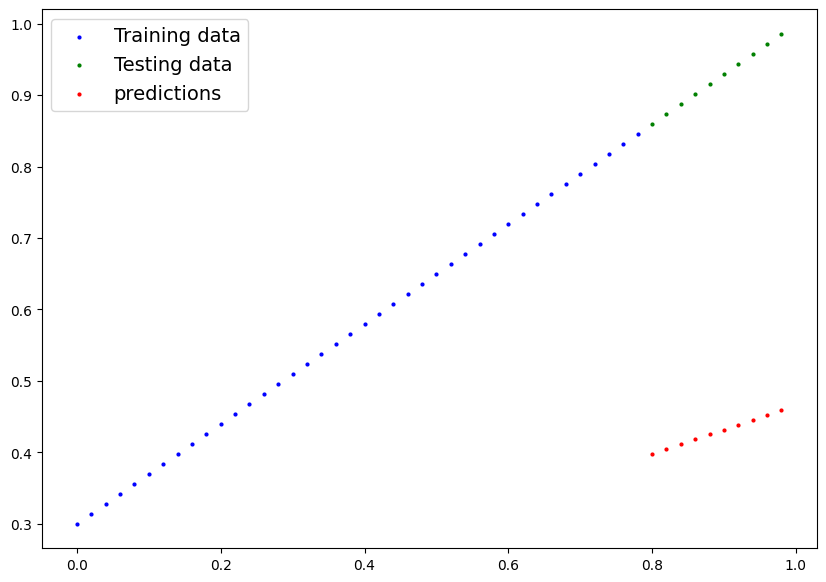

In [12]:
plot_predictions(predictions=Y_preds)

### 3. Training model

The whole idea of training is for a model  move from unknown to known paramters

or in other words from a poor representation of the data to a better representation of the data

one way to measure how poor or how wrong your models prediciton are is to use a loss function.

Things we need to train:

* Loss Funtion
* Optimizer : Takes into account the loss of a model and adjusts model's parameters(e.g weights and bias in our case) to improve the loss function

and specifically in pytorch we need 🇰
* A training loop
* A tesing loop


In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
#Setting up a loss function
#Mean Absolute Error or L1 Loss in Pytorch
#Mean absolute error between each element in input x and target y
loss_fn = nn.L1Loss()

#Setting up an optimizer
#Give model values like weight an bias in our case
#torch.optim is package implementation optimizer i.e gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #params are those which are needed to update
                            #lr = learning rate


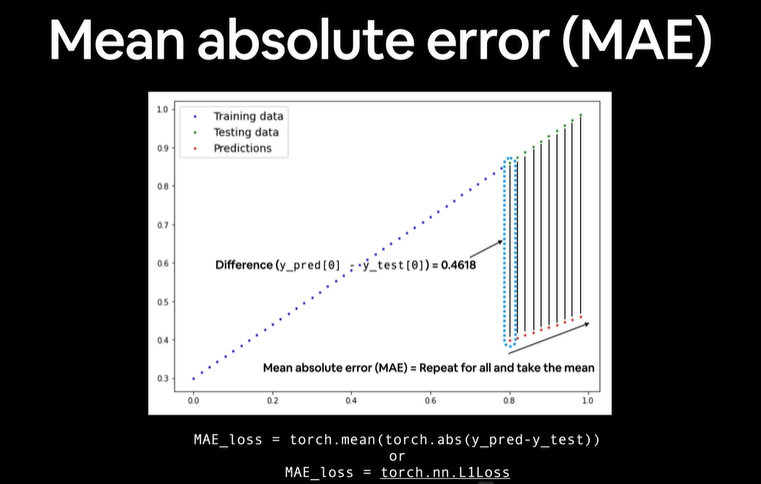

### Building a training loop in pytorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our function forward funtion > forward propogation)
2. Calculate the loss , Compare forward pass predictionsto ground truth labels
3. Optimizer zero grad
4. Loss backward - move backwards ** back propogation** to calculate the gradients of each of the parameter of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. **gradient Descent**



In [15]:
# An epoch is one loop through the data....
torch.manual_seed(40)
epochs = 200

#track different values
epoch_counts = []
loss_values = []
test__loss_values = []

###Training
# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training model
  model_0.train()
  # 1. Forward pass
  Y_pred = model_0(X_train)

  # 2. Calculate the loss
  #loss = ypred[]-ytest[]
  loss = loss_fn(Y_pred, Y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propogation on the loss with respect to paramters of the model
  loss.backward()

  # 5. Step the the optimizer(Perform gradient descent)
  #before performing step() we make optimizer to zero grad so that for each iteration it should start
  optimizer.step()

  model_0.eval() #turns off different setting not required for testing
  #we write above when we start testing
  with torch.inference_mode():
    #1. do forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, Y_test)


  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test__loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss} ")


  #gradient tracking is tracking the slope when we going down hill
  # torch calculate gradients with autograd
  # Learning Rate Scheduling :  Have larger learning rate initially and then go small and smaller.....

Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.48106518387794495 
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss : 0.3463551998138428 
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss : 0.21729660034179688 
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss : 0.14464017748832703 
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss : 0.11360953003168106 
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss : 0.09919948130846024 
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss : 0.08886633068323135 
Epoch : 70 | Loss : 0.03476089984178543 | Test Loss : 0.0805937647819519 
Epoch : 80 | Loss : 0.03132382780313492 | Test Loss : 0.07232122868299484 
Epoch : 90 | Loss : 0.02788739837706089 | Test Loss : 0.06473556160926819 
Epoch : 100 | Loss : 0.024458957836031914 | Test Loss : 0.05646304413676262 
Epoch : 110 | Loss : 0.021020207554101944 | Test Loss : 0.04819049686193466 
Epoch : 120 | Loss : 0.01758546568453312 | Test Loss : 0.04060482233762741 
Epoch : 130 | Loss : 0.

### What is actually happening above in training ?


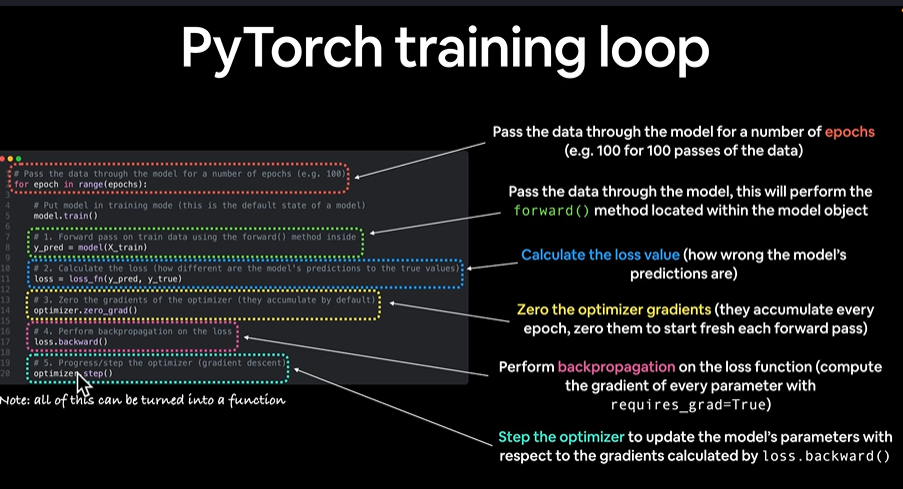


For the testing :


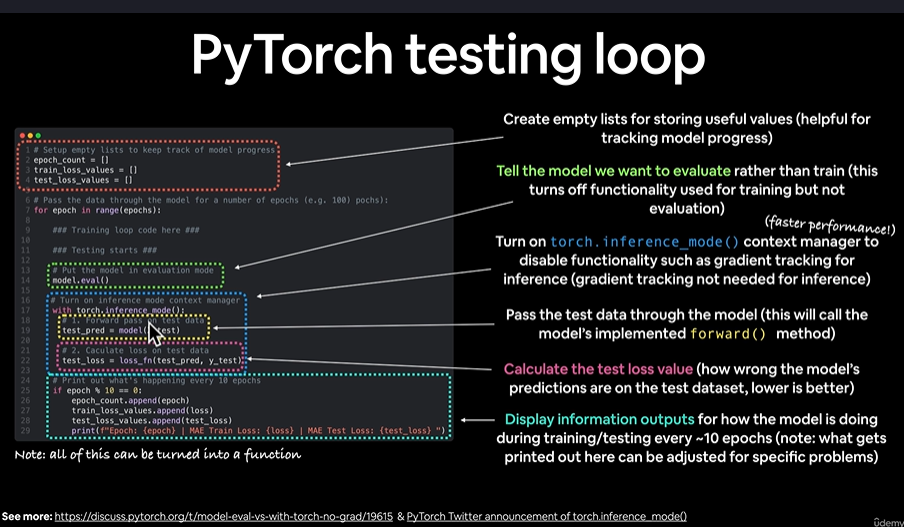

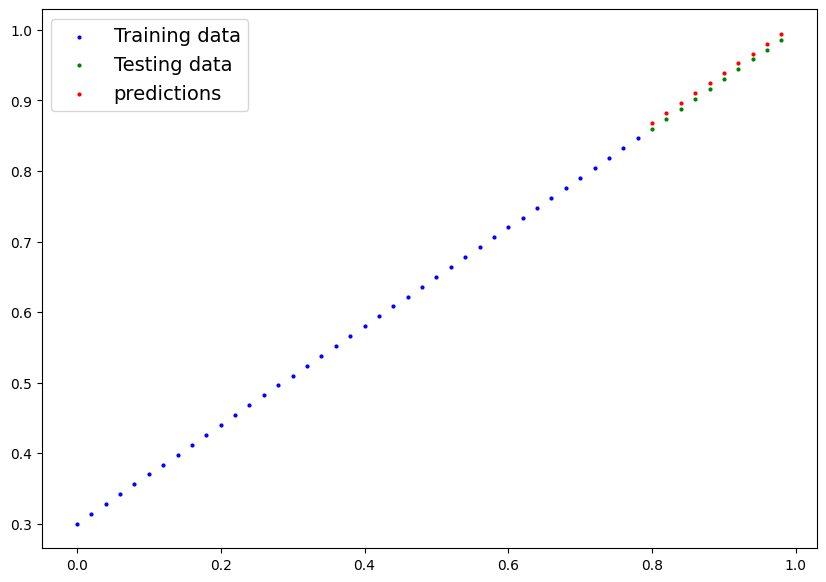

In [16]:
plot_predictions(predictions = test_pred)

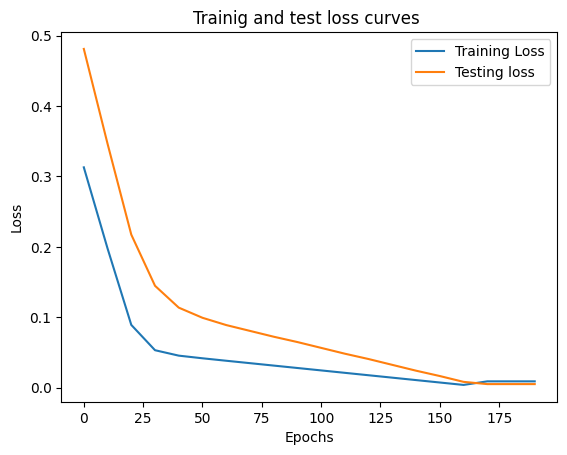

In [17]:
import numpy as np

np_loss = np.array(torch.tensor(loss_values).numpy())
np_test_loss = np.array(torch.tensor(test__loss_values).numpy())

#plotting the loss curves
plt.plot(epoch_counts, np_loss, label = 'Training Loss')
plt.plot(epoch_counts, np_test_loss, label ='Testing loss' )
plt.title("Trainig and test loss curves ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving the model

There are three main methods for saving and loading the model

1. `torch.save()` - allows you to save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you to load a saced pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [21]:
# Saving our pytorch model
from pathlib import Path

#1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH )

Saving model to:models/01_pytorch_workflow_model_0.pth


In [22]:
#loading the model
#Since We saved our model's State_dict() rather the entire model, we'ill create
#a new instance of our model class and load the saved state_dict() into that

#creating a new version or initializing the new version
loaded_model_0 = LinearRegression()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([-0.3482]))])

In [24]:
#loading saved models parameter

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
#checking our loaded models prediction
loaded_model_0.eval()
with torch.inference_mode():
  Y_pred_loaded_model = loaded_model_0(X_test)

Y_pred_loaded_model

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
#checking our loaded models prediction
model_0.eval()
with torch.inference_mode():
  Y_pred_original_trained = loaded_model_0(X_test)

Y_pred_original_trained

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
Y_pred_loaded_model == Y_pred_original_trained

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting Everything Together

Let's go back through the steps above and see it all in one place

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [4]:
#setting up device agnostic code

device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"using device {device}")

using device cpu


### 6.1 Data

In [30]:
import torch
X = torch.arange(start = 0, end = 1, step=0.02).unsqueeze(dim = 1)
W = 0.7
B = 0.3
Y = W*X +B
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]

X_test, Y_test = X[split:], Y[split:]


len(X_train) , len(Y_train) , len(X_test), len(Y_test)


(40, 40, 10, 10)

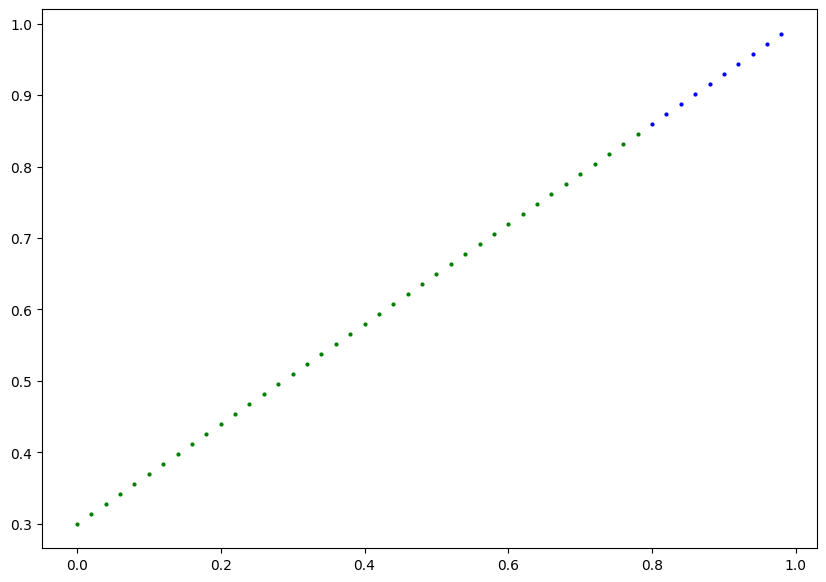

In [48]:
def plot_predictions2(X_train = X_train,
                      Y_train = Y_train,
                      X_test = X_test,
                      Y_Test = Y_test,
                      Predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(X_train, Y_train, c='g' , s=4, label = 'Training')
  plt.scatter(X_test, Y_test, c ='b', s=4, label = 'Testing')
  if Predictions is not None:
    plt.scatter(X_test, Predictions, c = 'r', s = 4, label = 'Predictions')
  plt.show()

plot_predictions2()


### 6.2 Model BUilding

In [35]:
# creating a linear regression model class
from torch import nn
#class inherits from nn.module
class LinearRegression2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
    #also called linear transform, probing layer, dense layer, fully connected layer
    #we have 1 > X and 1 >  Y

    # Forward Method to define computation in the model, we need to define forward class as nn.module require us to do so
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegression2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [36]:
#checking the device
next(model_1.parameters()).device

device(type='cpu')

In [37]:
#Set the model to use the target device
model_1.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)


### 6.3 Model Training

For Training we need

* loss Function
* Optimizer
* Training Loop
* testing Loop

In [23]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [44]:
torch.manual_seed(42)
epochs = 200
for epoch in range(0,epochs):
  model_1.train()
  #1. Forward pass
  Y_pred = model_1(X_train)
  #2. Calculate the loss
  loss = loss_fn(Y_pred,Y_train)
  #3. Optimizer zero Grad
  optimizer.zero_grad()
  #4. Back Propagation
  loss.backward()
  #5. Optimizer step Gradient Descent
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss =  loss_fn(test_pred,Y_test)

  if epoch % 10 == 0:
    print(f" epoch : {epochs} | Testing loss : {loss} | Testing Loss : {test_loss}")

 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss : 0.5874472260475159
 epoch : 200 | Testing loss : 0.5551779866218567 | Testing Loss :

In [46]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [49]:
model_1.eval()
with torch.inference_mode():
  predictions  = model_1(X_test)

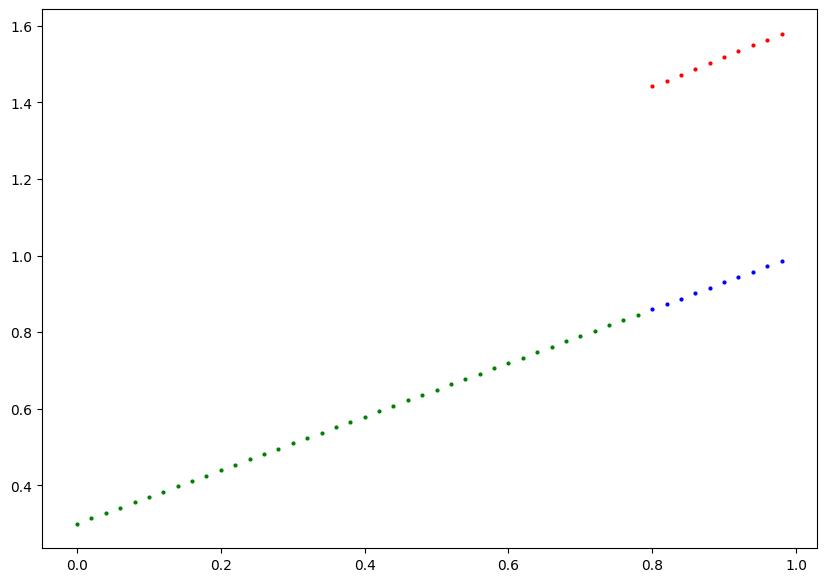

In [51]:
plot_predictions2(Predictions = predictions.cpu())


#### WE DID SOME OVER FITTINGGGGGGGGGGGGGGGGGGGGGGGG !!!

### 6.4 Saving and loading model

In [53]:
from pathlib import Path

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

In [57]:
model_loaded_1 = LinearRegression2()

model_loaded_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

model_loaded_1.to(device), model_loaded_1.state_dict()

(LinearRegression2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))